<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/kaggle_4%EC%98%88%EC%A0%9C1_%EB%B6%93%EA%BD%83%ED%92%88%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 3.8MB 2.8MB/s 
     |████████████████████████████████| 512kB 32.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=03e9ecedbca016c65249f113acc19a8bc2fa1b88f3e948d797329b45a1b902f8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/multinomial/kaggle/예제1_붓꽃품종.csv')
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

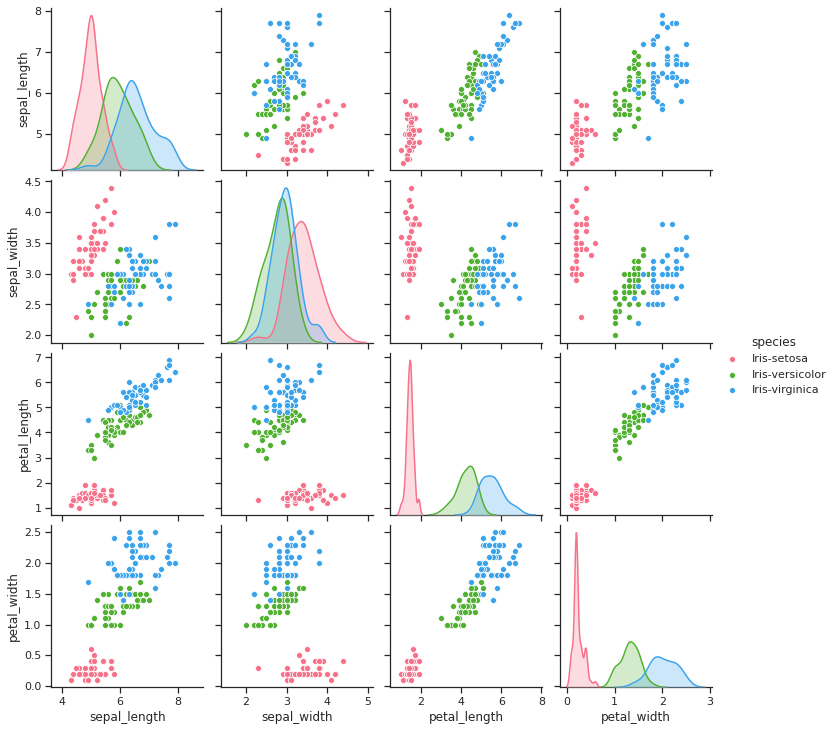

In [0]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(xy_df, hue="species", palette="husl")

In [0]:
xy_df.columns = ['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비', '종류']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비,종류
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
꽃받침 길이,5.843333
꽃받침 너비,3.054000
꽃잎 길이,3.758667
꽃잎 너비,1.198667


In [0]:
pd.DataFrame(xy_df.min(), columns=["최솟 값"])

,최솟 값
꽃받침 길이,4.3
꽃받침 너비,2
꽃잎 길이,1
꽃잎 너비,0.1
종류,Iris-setosa


In [0]:
pd.DataFrame(xy_df.max(), columns=["최댓 값"])

,최댓 값
꽃받침 길이,7.9
꽃받침 너비,4.4
꽃잎 길이,6.9
꽃잎 너비,2.5
종류,Iris-virginica


In [0]:
# 레이블 인코딩 과정 (문자열(종류)을 대응하는 정수로 변경)
labelEncoder = LabelEncoder()

In [0]:
xy_df.iloc[:,[-1]] = labelEncoder.fit_transform(xy_df.iloc[:,[-1]]) # 레이블 인코딩(문자열 레이블->정수)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
xy_df # 확인

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비,종류
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(종류)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(150, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [0]:
np.unique(y_data, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 30%

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([35, 35, 35]))

In [0]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (105, 4) 	 (105, 1)
테스트용  (45, 4) 	 (45, 1)


In [0]:
scaler = StandardScaler()

In [0]:
nb_classes = 3 # 분류할 클래스의 개수

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.int32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , nb_classes]), name='weight') 
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')

In [0]:
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [0]:
#softmax 는 벡터 그대로 유지 시킨 상태에서 확률만 표시해 줌 
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [0]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
cost = tf.reduce_mean(cost_i)

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
prediction = tf.argmax(hypothesis, 1)

In [0]:
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 5 # 5개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [0]:
epochs = 4201
  
for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step,"\t cost=", fold_cost/n_fold, "\t accuracy=",str(fold_accuracy/n_fold*100)[:5], "%")

step= 0 	 cost= 3.794616222381592 	 accuracy= 0.0 %
step= 200 	 cost= 1.468090295791626 	 accuracy= 34.28 %
step= 400 	 cost= 0.8316166281700135 	 accuracy= 59.04 %
step= 600 	 cost= 0.5951603651046753 	 accuracy= 78.09 %
step= 800 	 cost= 0.483427906036377 	 accuracy= 85.71 %
step= 1000 	 cost= 0.4224390208721161 	 accuracy= 86.66 %
step= 1200 	 cost= 0.3845583438873291 	 accuracy= 87.61 %
step= 1400 	 cost= 0.3583288013935089 	 accuracy= 89.52 %
step= 1600 	 cost= 0.3386081874370575 	 accuracy= 89.52 %
step= 1800 	 cost= 0.3228758811950684 	 accuracy= 90.47 %
step= 2000 	 cost= 0.3097838282585144 	 accuracy= 91.42 %
step= 2200 	 cost= 0.2985525369644165 	 accuracy= 91.42 %
step= 2400 	 cost= 0.28870016932487486 	 accuracy= 91.42 %
step= 2600 	 cost= 0.2799116224050522 	 accuracy= 91.42 %
step= 2800 	 cost= 0.2719708770513535 	 accuracy= 91.42 %
step= 3000 	 cost= 0.2647240191698074 	 accuracy= 91.42 %
step= 3200 	 cost= 0.258057576417923 	 accuracy= 91.42 %
step= 3400 	 cost= 0.25188

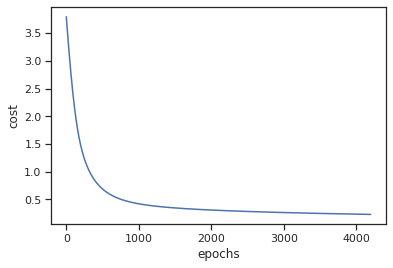

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

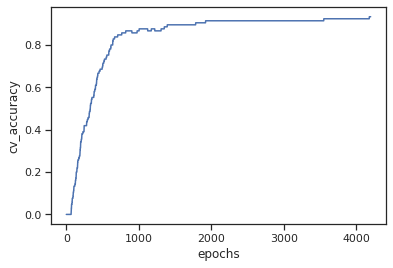

In [0]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

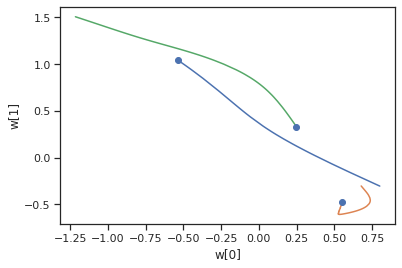

In [0]:
# 가중치 업데이트 과정 그래프 (꽃받침 길이, 꽃받침 너비)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [0]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 97.77%


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[5.8, 3.0, 3.7, 1.1], 
                     [4.0, 4.0, 1.0, 1.1],
                     [5.8, 3.0, 5.0, 4.1],      
                     [7.0, 7.0, 2.0, 1.1],  
                     [8.8, 8.0, 4.7, 2.1]]) 
X_test_5_scaled = scaler.transform(X_test_5)

In [0]:
print(sess.run(prediction, feed_dict={X:X_test_5_scaled}))

[1 0 2 0 2]


In [0]:
try:
  x_input = input("입력(꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("꽃받침 길이\t꽃받침 너비\t꽃잎 길이\t꽃잎 너비")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(prediction, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비): 8.8,8.0,4.7,2.1
꽃받침 길이	꽃받침 너비	꽃잎 길이	꽃잎 너비
8.8		8.0		4.7		2.1		
예상 결과 :  [2]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비'])

In [0]:
result_df

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
0,5.8,3.0,3.7,1.1
1,4.0,4.0,1.0,1.1
2,5.8,3.0,5.0,4.1
3,7.0,7.0,2.0,1.1
4,8.8,8.0,4.7,2.1


In [0]:
result_df['예측 결과'] = sess.run(prediction, feed_dict={X:X_test_5_scaled})

In [0]:
result_df['예측 결과'] = labelEncoder.inverse_transform(result_df['예측 결과']) # 역 레이블 인코딩(정수->문자열 레이블)

In [0]:
result_df

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비,예측 결과
0,5.8,3.0,3.7,1.1,Iris-versicolor
1,4.0,4.0,1.0,1.1,Iris-setosa
2,5.8,3.0,5.0,4.1,Iris-virginica
3,7.0,7.0,2.0,1.1,Iris-setosa
4,8.8,8.0,4.7,2.1,Iris-virginica


In [0]:
sess.close()